In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

##### Loading the Data

In [27]:
data = pd.read_csv('./Hitters.csv')
data


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


##### Create a demo dataFrame for Learning purposes.

In [28]:
import pandas as pd
import numpy as np

# Set seed for reproductibility
np.random.seed(42)

#Generate 50 entries
n = 50

heights = np.random.normal(loc=170, scale=10, size=n).astype(int)
genders = np.random.choice(['male','female'],size=n)
#heights = np.random.normal(loc=170,scale=10,size=n) #Noraml distribution around 170 cm
ages = np.random.randint(18,40,size=n) #Age between 18 and 40
classes = np.random.choice(['A', 'B', 'C'], size=n)

# Create DataFrame
df = pd.DataFrame({
    'gender': genders,
    'height': heights,
    'age': ages,
    'class': classes,
    'grades': np.nan  # All NaN
})

# Introduce 7 missing values in the 'height' column
missing_indices = np.random.choice(df.index, size=7, replace=False)
df.loc[missing_indices, 'height'] = np.nan

print(df)

    gender  height  age class  grades
0     male   174.0   31     C     NaN
1     male   168.0   20     C     NaN
2     male   176.0   18     B     NaN
3     male   185.0   22     A     NaN
4     male   167.0   31     A     NaN
5     male     NaN   24     B     NaN
6     male   185.0   26     A     NaN
7     male     NaN   32     B     NaN
8   female   165.0   32     B     NaN
9     male   175.0   27     C     NaN
10  female   165.0   30     B     NaN
11  female   165.0   36     C     NaN
12  female   172.0   24     A     NaN
13    male     NaN   34     A     NaN
14    male   152.0   37     A     NaN
15    male   164.0   21     A     NaN
16    male   159.0   22     C     NaN
17  female   173.0   24     A     NaN
18    male   160.0   30     B     NaN
19    male   155.0   32     B     NaN
20    male     NaN   28     B     NaN
21    male     NaN   21     C     NaN
22    male   170.0   30     A     NaN
23  female   155.0   24     A     NaN
24    male   164.0   36     A     NaN
25  female  

##### Learning Data Preparation

In [29]:
#You can check missing values with
df.isnull().sum()

#df.dropna(subset=['height'], inplace=True)
df.drop(columns=['grades'], inplace=True)
print(df.head())


  gender  height  age class
0   male   174.0   31     C
1   male   168.0   20     C
2   male   176.0   18     B
3   male   185.0   22     A
4   male   167.0   31     A


In [30]:
#### Nan values from the height 
# Delete the Row
df_dropped = df.copy()
data_deleted_row = df_dropped.dropna(subset=['height'])


# Make copies for imputation
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()
df_value = df.copy()

#Replace Nan values with Mean, Median, Mode or Fixed value
df_mean['height'] = df_mean['height'].fillna(df_mean['height'].mean())
df_median['height'] = df_median['height'].fillna(df_median['height'].median())
df_mode['height'] = df_mode['height'].fillna(df_mode['height'].mode()[0]).astype(int)
df_value['height'] = df_value['height'].fillna(170).astype(int)



##### Transform the NonNumberical Values - One hot encoding

In [31]:

df = df_median
class_colums = pd.get_dummies(df['class'], prefix='Class',dtype='int')
gender_colums = pd.get_dummies(df['gender'],prefix='Gender',dtype='int')
class_colums.head()
gender_colums.head()

,Gender_female,Gender_male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [32]:
#Compbine them
data = df
new_colums = data[['height','age']]
data = pd.concat([new_colums,class_colums,gender_colums], axis='columns')
data.head()

,height,age,Class_A,Class_B,Class_C,Gender_female,Gender_male
0,174.0,31,0,0,1,0,1
1,168.0,20,0,0,1,0,1
2,176.0,18,0,1,0,0,1
3,185.0,22,1,0,0,0,1
4,167.0,31,1,0,0,0,1


##### Correlation Matrix

In [33]:
correlation_matrix = pd.DataFrame.corr(data)
correlation_matrix

,height,age,Class_A,Class_B,Class_C,Gender_female,Gender_male
height,1.000000,-0.141416,-0.045780,-0.066037,0.113551,0.035247,-0.035247
age,-0.141416,1.000000,0.163871,-0.136678,-0.027614,0.020752,-0.020752
Class_A,-0.045780,0.163871,1.000000,-0.515152,-0.492366,-0.158645,0.158645
Class_B,-0.066037,-0.136678,-0.515152,1.000000,-0.492366,0.019608,-0.019608
Class_C,0.113551,-0.027614,-0.492366,-0.492366,1.000000,0.141193,-0.141193
Gender_female,0.035247,0.020752,-0.158645,0.019608,0.141193,1.000000,-1.000000
Gender_male,-0.035247,-0.020752,0.158645,-0.019608,-0.141193,-1.000000,1.000000


In [34]:
correlation_matrix.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1).format(precision=2)

,height,age,Class_A,Class_B,Class_C,Gender_female,Gender_male
height,1.00,-0.14,-0.05,-0.07,0.11,0.04,-0.04
age,-0.14,1.00,0.16,-0.14,-0.03,0.02,-0.02
Class_A,-0.05,0.16,1.00,-0.52,-0.49,-0.16,0.16
Class_B,-0.07,-0.14,-0.52,1.00,-0.49,0.02,-0.02
Class_C,0.11,-0.03,-0.49,-0.49,1.00,0.14,-0.14
Gender_female,0.04,0.02,-0.16,0.02,0.14,1.00,-1.00
Gender_male,-0.04,-0.02,0.16,-0.02,-0.14,-1.00,1.00


##### BoxPlot

In [41]:
data[['height']].boxplot(vert=False)


<Axes: >

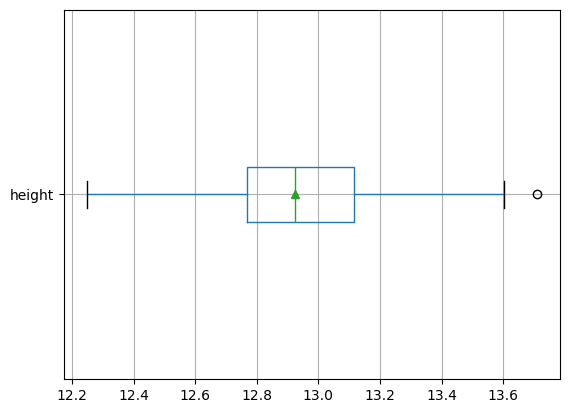

In [48]:
data[["height"]].apply(np.sqrt).boxplot(vert=False, showmeans=True)
plt.show()

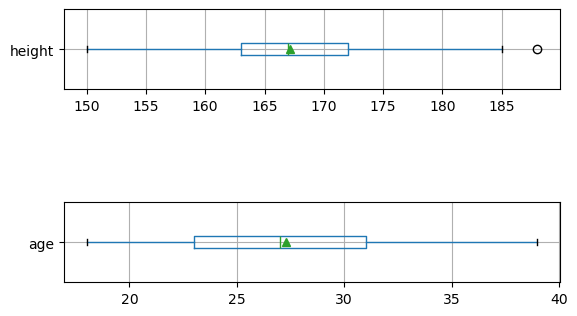

In [40]:
selectedFeatures = ['height', 'age']

for idx, f in enumerate(selectedFeatures):
    plt.subplot(2*len(selectedFeatures),1,2*idx +1)
    data[[f]].boxplot(vert=False,showmeans=True)
    
plt.show()

In [ ]:
for idx, f in enumerate(selectedFeatures):
    plt.subplot(2*len(selectedFeatures),1,2*idx +1)
    data[[f]].boxplot(vert=False,showmeans=True)
    